In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
data_date = "2023-06-25"

In [3]:
data = pd.read_csv(data_date + "_data_cleaned_location_enhanced.csv")
data.head()

url_id  Celková cena  Podlaží  Užitná plocha  Sklep  Parkování  Výtah  \
0   722035788     6832000.0      2.0           48.0      1          1      1   
1  2418832972     6361000.0      1.0           53.0      0          1      0   
2  3930260556     2214000.0      5.0           35.0      1          1      1   
3  3756315724     5643000.0      4.0           68.0      1          0      1   
4  3955312204     5390000.0      4.0           38.0      1          0      1   

    Latitude  Longitude  Terasa  ...  Obecná kriminalita  \
0  50.049548  14.462156       0  ...               35056   
1  50.296096  16.359198       0  ...                4955   
2  50.723614  15.189542       0  ...                6551   
3  50.051077  14.298411       0  ...               35056   
4  50.049265  14.438260       0  ...               35056   

   Hospodářská kriminalita  Loupeže  Vloupání do bytů a rodinných domů  \
0                     3040      255                                984   
1                      565       26                                142   
2                      687       67                                183   
3                     3040      255                                984   
4                     3040      255                                984   

   Znásilnění  Vraždy  Rodinné domy (Kč za m2)  Byty (Kč za m2)  \
0         153      24                    96498           100727   
1          53       9                    37856            41035   
2          56       2                    39631            39361   
3         153      24                    96498           100727   
4         153      24                    96498           100727   

   Teoretická cena  Total_foreigners  
0        4834896.0            345307  
1        2174855.0             38806  
2        1377635.0             42622  
3        6849436.0            345307  
4        3827626.0            345307  

[5 rows x 175 columns]

In [9]:
key_columns = ['Celková cena', 'Podlaží', 'Užitná plocha']
descriptive_stats = data[key_columns].describe()

descriptive_stats

Celková cena       Podlaží  Užitná plocha
count  1.567900e+04  15679.000000   15679.000000
mean   3.394964e+06      3.205689      46.355507
std    2.243369e+06      2.650083      21.239936
min    2.200000e+05      0.000000      11.000000
25%    1.681000e+06      2.000000      30.000000
50%    2.819000e+06      3.000000      41.000000
75%    4.572500e+06      4.000000      60.000000
max    1.060300e+07    140.000000     108.000000

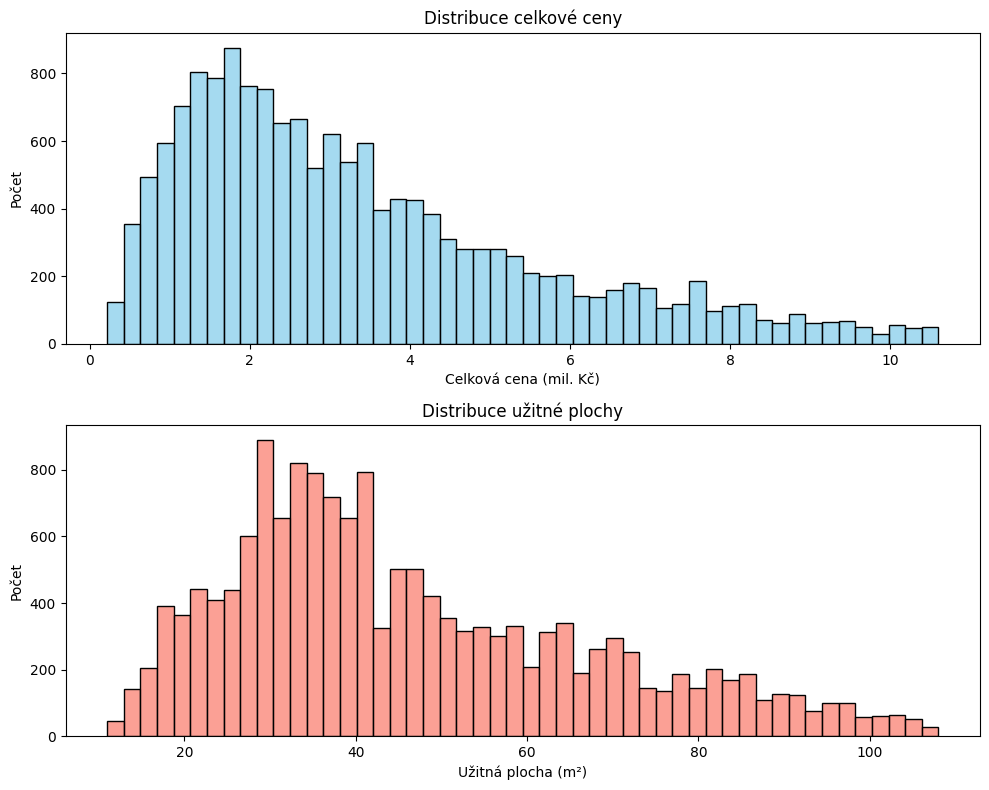

In [11]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Define a custom tick formatter
def millions_formatter(x, pos):
    return f'{int(x/1e6)}'

# Plot histogram for 'Celková cena'
sns.histplot(data=data, x='Celková cena', bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Distribuce celkové ceny')
ax[0].set_xlabel('Celková cena (mil. Kč)')
ax[0].set_ylabel('Počet')

# Set the custom formatter
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# Plot histogram for 'Užitná plocha'
sns.histplot(data=data, x='Užitná plocha', bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Distribuce užitné plochy')
ax[1].set_xlabel('Užitná plocha (m²)')
ax[1].set_ylabel('Počet')

# Adjust layout
plt.tight_layout()
plt.show()


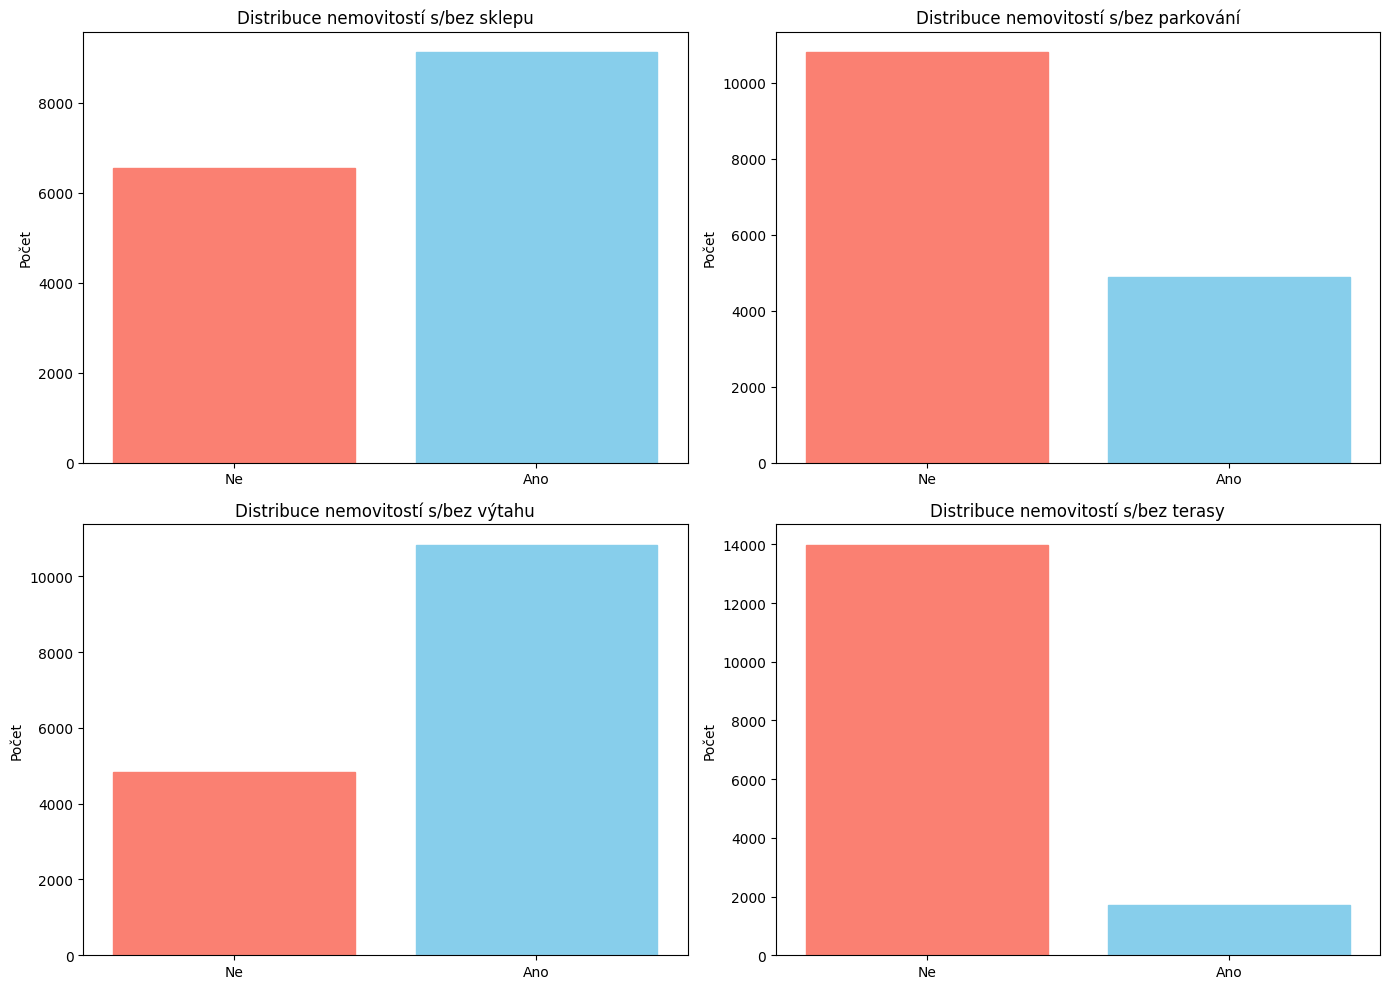

In [12]:
# Bar plots for binary features

binary_features = ['Sklep', 'Parkování', 'Výtah', 'Terasa']
feature_names = ['sklepu', 'parkování', 'výtahu', 'terasy']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for ax, feature, name in zip(axes.ravel(), binary_features, feature_names):
    countplot = sns.countplot(data=data, x=feature, ax=ax)
    ax.set_title(f'Distribuce nemovitostí s/bez {name}')
    ax.set_xlabel('')
    ax.set_xticklabels(['Ne', 'Ano'])
    ax.set_ylabel('Počet')
    
    # Set the colors of the bars here
    for i, bar in enumerate(countplot.patches):
        if i % 2 == 0:  # 'Ne' values
            bar.set_color('salmon')
        else:           # 'Ano' values
            bar.set_color('skyblue')

plt.tight_layout()
plt.show()

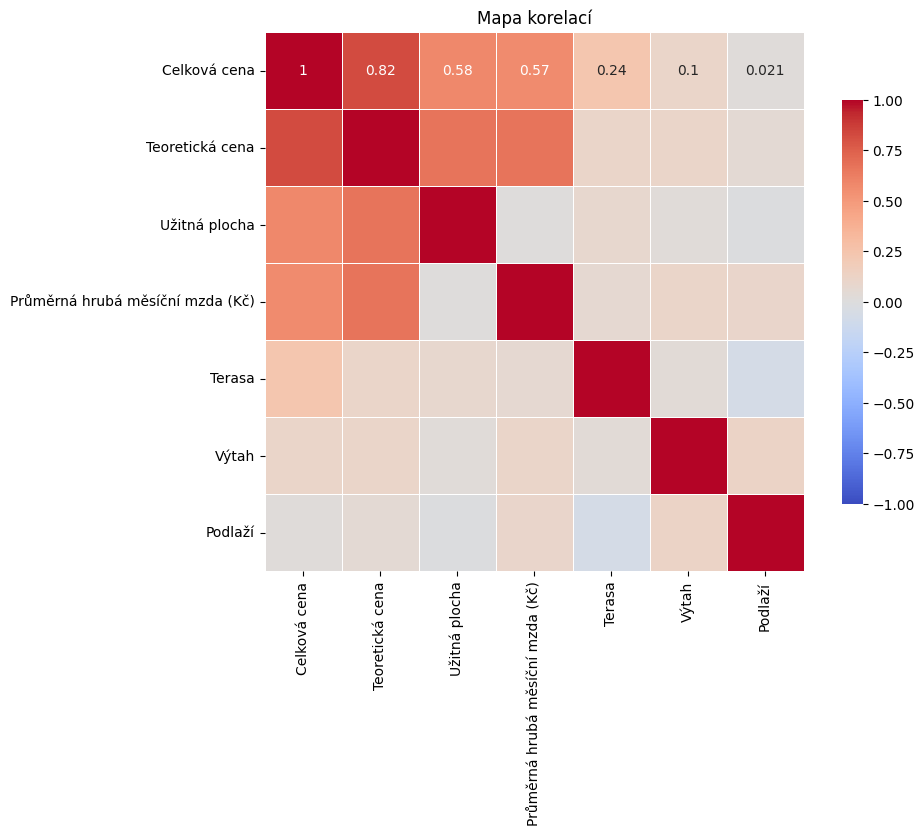

In [20]:
# Correlation heatmap for selected columns

selected_columns = ['Celková cena', 'Teoretická cena', 'Užitná plocha', 'Průměrná hrubá měsíční mzda (Kč)', 'Terasa', 'Výtah', 'Podlaží' ]
correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Mapa korelací')
plt.show()


In [4]:
# create a map centered on the first listing's latitude and longitude
map = folium.Map(location=[data['Latitude'][0], data['Longitude'][0]], zoom_start=12)

# add a marker for each listing
for index, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(map)

# display the map
map

In [13]:
# Create a map centered around the average coordinates
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Create a list of [latitude, longitude, weight] for the HeatMap
heat_data = [[row['Latitude'], row['Longitude'], row['Celková cena']] for index, row in data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data, min_opacity=0.1, max_zoom=40, radius=20, blur=1, max_val=0.6).add_to(m)


# Display the map
m

/var/folders/2v/zjk16qr55dv34_t6b41l4rph0000gn/T/ipykernel_9617/2109061871.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, min_opacity=0.1, max_zoom=40, radius=20, blur=1, max_val=0.6).add_to(m)


In [24]:
# Create a map centered around the average coordinates
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Create a list of [latitude, longitude, weight] for the HeatMap
heat_data = [[row['Latitude'], row['Longitude'], row['Užitná plocha']] for index, row in data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data, min_opacity=0.1, max_zoom=40, radius=40, blur=15, max_val=1.0).add_to(m)

# Display the map
m

/var/folders/2v/zjk16qr55dv34_t6b41l4rph0000gn/T/ipykernel_67336/1841922868.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, min_opacity=0.1, max_zoom=40, radius=40, blur=15, max_val=1.0).add_to(m)


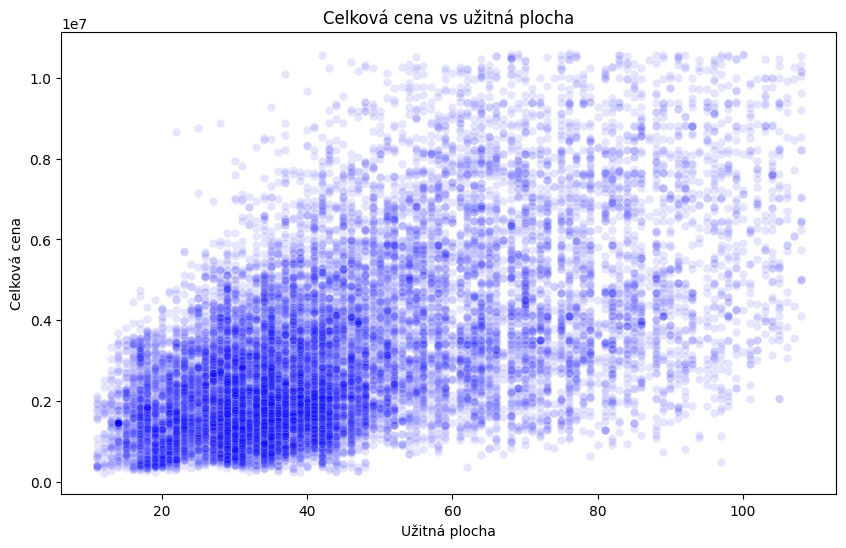

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Užitná plocha', y='Celková cena', data=data, color='blue', alpha=0.1)
plt.title('Celková cena vs užitná plocha')
plt.xlabel('Užitná plocha')
plt.ylabel('Celková cena')
plt.show()


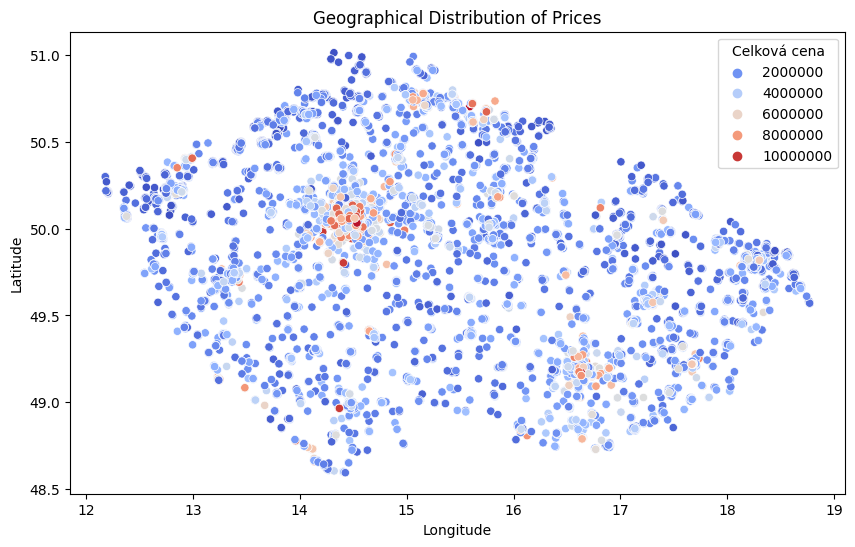

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Celková cena', palette='coolwarm', data=data)
plt.title('Geographical Distribution of Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
